In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from cmath import exp, sqrt, pi, cos, sin

In [5]:
class HydrogenicAtom:
    """
    This class models the wavefunctions and energy levels of a hydrogenic atom.
    """
    
    def __init__(self, l, ml):
        """
        Parameters
        ----------    
        theta: float
            Theta coordinate, from 0 to 2*pi

        phi: float
            Phi coordinate, from 
        """
        self.l = l
        self.ml = ml
    
    def spherical_harmonic(self, theta, phi):
        """
        Find the value of the spherical harmonic given an quantum numbers
        l, ml and coordinates theta, phi.
        
        Parameters
        ----------    
        theta: float
            Theta coordinate, from 0 to 2*pi

        phi: float
            Phi coordinate, from 
        """
        if self.l == 0 and self.ml == 0:
            return sqrt(1 / 4.0 / pi)
        
        elif self.l == 1 and self.ml == 0:
            return sqrt(3.0 / 4.0 / pi) * cos(theta)
        elif self.l == 1 and self.ml == 1:
            return -sqrt(3.0 / 8.0 / pi) * sin(theta) * exp(1j * phi)
        elif self.l == 1 and self.ml == -1:
            return -sqrt(3.0 / 8.0 / pi) * sin(theta) * exp(-1j * phi)
        
        elif self.l == 2 and self.ml == 0:
            return sqrt(15.0 / 16.0 / pi) * (3 * cos(theta) ** 2 - 1)
        elif self.l == 2 and self.ml == 1:
            return -sqrt(15.0 / 16.0 / pi) * cos(theta) * sin(theta) * exp(1j * phi)
        elif self.l == 2 and self.ml == -1:
            return sqrt(15.0 / 16.0 / pi) * cos(theta) * sin(theta) * exp(-1j * phi)
        elif self.l == 2 and self.ml == 2:
            return sqrt(15.0 / 16.0 / pi) * sin(theta) ** 2 * exp(2j * phi)
        elif self.l == 2 and self.ml == -2:
            return sqrt(15.0 / 16.0 / pi) * sin(theta) ** 2 * exp(-2j * phi)
        
        elif self.l == 3 and self.ml == 0:
            return sqrt(7.0 / 16.0 / pi) * (5 * cos(theta) ** 3 - cos(theta))
        elif self.l == 3 and self.ml == 1:
            return -sqrt(21.0 / 64.0 / pi) * (5 * cos(theta) ** 2 - 1) * sin(theta) * exp(1j * psi)
        elif self.l == 3 and self.ml == -1:
            return sqrt(21.0 / 64.0 / pi) * (5 * cos(theta) ** 2 - 1) * sin(theta) * exp(-1j * psi)
        elif self.l == 3 and self.ml == 2:
            return sqrt(105.0 / 32.0 / pi) * sin(theta) ** 2 cos(theta) * exp(2j * psi)
        elif self.l == 3 and self.ml == -2:
            return sqrt(105.0 / 32.0 / pi) * sin(theta) ** 2 cos(theta) * exp(-2j * psi)
        elif self.l == 3 and self.ml == 3:
            return -sqrt(35.0 / 64.0 / pi) * sin(theta) ** 3 * exp(3j * psi)
        elif self.l == 3 and self.ml == 3:
            return sqrt(35.0 / 64.0 / pi) * sin(theta) ** 3 * exp(-3j * psi)
        
        else:
            raise Exception(f'No equation for l={self.l} and ml={self.ml}')

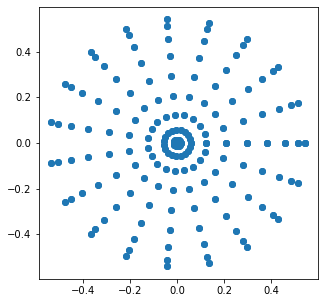

In [6]:
ha = HydrogenicAtom(l=2, ml=-2)
l = 1
ml = -1
thetas = np.linspace(0, 2 * pi, 20)
phis = np.linspace(0, pi, 20)
spherical = []
for phi in phis:
    for theta in thetas:
        spherical.append(ha.spherical_harmonic(theta, phi))
spherical = np.array(spherical)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.scatter(spherical.real, spherical.imag)